In [1]:
import networkx as nx

In [2]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)
# Import NetworkX
import networkx as nx

In [7]:
import pandas as pd
import networkx as nx

# Initialize a graph
G_air = nx.Graph()

# Read data using pandas
data_file = 'airlines.csv'  # Assuming the CSV file is in the current working directory
df = pd.read_csv(data_file)

# Loop through the DataFrame rows
for index, row in df.iterrows():
    count = row['count']
    v = row['v']
    w = row['w']
    year = row['year']
    month = row['month']

    # Convert count to int
    count = int(count)

    if count == 0 or v == w:
        continue

    try:
        G_air.edges[v, w]['count'] += count
    except KeyError:
        G_air.add_edge(v, w, count=count)


KeyError: 'count'

In [ ]:
# Load data from the CSV file using pandas
data_file = 'airlines.csv' 
df = pd.read_csv(data_file)

B = nx.Graph()
# Skip header
    next(f)
    # Loop through data rows
    for row in f:
        count, v, w, year, month = row.strip().split(',')
        count = int(count)
        if count == 0 or v == w:
            continue
        try:
            G_air.edges[v, w]['count'] += count
        except KeyError:
            G_air.add_edge(v, w, count=count)

In [ ]:
# Load latitude and longitude of airports
airport_lat_long = {}
with open(data_dir / 'partow' / 'GlobalAirportDatabase.txt') as f:
    for row in f:
        columns = row.strip().split(':')
        code = columns[1]
        lat = float(columns[14])
        long = float(columns[15])
        airport_lat_long[code] = (lat, long)

In [6]:
# Load latitude and longitude of airports
airport_lat_long = {}
with open('GlobalAirportDatabase.txt') as f:
    for row in f:
        columns = row.strip().split(':')
        code = columns[1]
        lat = float(columns[14])
        long = float(columns[15])
        airport_lat_long[code] = (lat, long)

In [8]:
G_karate = nx.karate_club_graph()

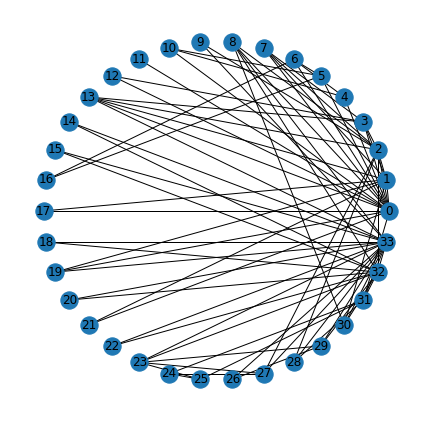

In [9]:
nx.draw_networkx(G_karate, pos=nx.circular_layout(G_karate))

In [10]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [11]:
import networkx.algorithms.community as nxcom
def community_net(G_in):
    G_out = nx.Graph()
    node_color = []
    node_community = {}
    communities = nxcom.greedy_modularity_communities(G_in)
    for i, com in enumerate(communities):
        for v in com:
            G_out.add_node(v)
            node_color.append(get_color(i))
            node_community[v] = i
    G_out.add_edges_from(G_in.edges())
    return node_color, node_community, G_out

In [12]:
node_color, node_community, G = community_net(G_karate)

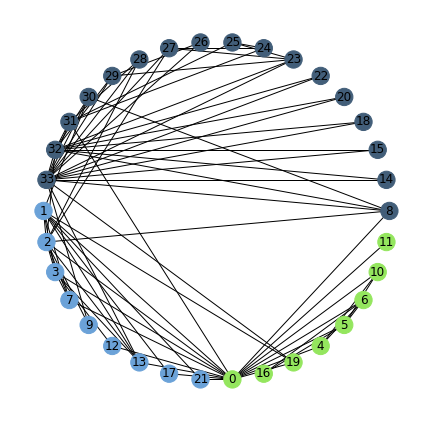

In [13]:
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=node_color)

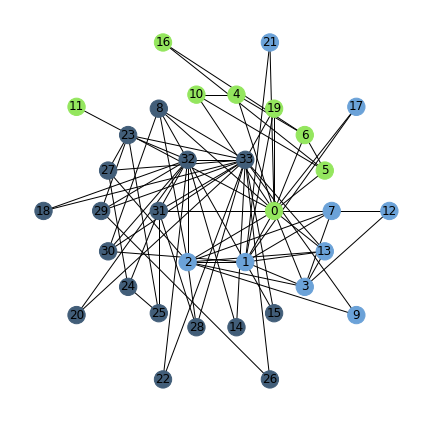

In [14]:
degrees = dict(G.degree())
labels = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)
nlist = []
i, k = 0, 6
while i < len(labels):
    shell_labels = labels[i:i+k]
    ordered_labels = sorted(shell_labels, key=lambda x: node_community[x])
    nlist.append(ordered_labels)
    i += k
    k += 12
pos = nx.shell_layout(G, nlist=nlist)
cm = plt.get_cmap('cool')
nx.draw_networkx(
    G, pos, alpha=1, node_color=node_color, with_labels=True)